<a href="https://colab.research.google.com/github/sahil296/Portfolio/blob/main/Task%203.1P%20Scikit-Learn%20for%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SIT719 Task 3.1 \
Collection of scikit-learn commands for machine learning, using core scikit commands applied
to a real world dataset. \
Dataset- [Real Estate Data South Carolina 2025](https://www.kaggle.com/datasets/kanchana1990/real-estate-data-south-carolina-2025)

In [24]:
# Section 1:this section includes all the libraries needed for this task.
# 1) Data handling (loading,merging,cleaning).
import pandas as pd
# 2) Plotting charts
import matplotlib.pyplot as plt
# 3) Model selection and preprocessing
from sklearn.model_selection import train_test_split #train and spliting
from sklearn.preprocessing import StandardScaler #scaling data
# 4) Regressors
from sklearn.linear_model import LinearRegression # simple linear model
from sklearn.tree import DecisionTreeRegressor #tree based regressor
from sklearn.neighbors import KNeighborsRegressor #KNN regression
# 5) Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score


In [25]:
# Section 2: In this section we will download dataset and set permissions
# 1) Uploading Kaggle API
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sahilnavin","key":"8e7f1be547134b2f75b9c98e52d763fd"}'}

In [26]:
# 2) Setting permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [27]:
# 3) Downloading dataset and unzipping
!kaggle datasets download -d kanchana1990/real-estate-data-south-carolina-2025
!unzip -o real-estate-data-south-carolina-2025.zip -d data

Dataset URL: https://www.kaggle.com/datasets/kanchana1990/real-estate-data-south-carolina-2025
License(s): ODC Attribution License (ODC-By)
real-estate-data-south-carolina-2025.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  real-estate-data-south-carolina-2025.zip
  inflating: data/realestate_data_southcarolina_2025.csv  


In [28]:
# Section 3: In this section we are going go load data and explore dataset.
import os
print(os.listdir("data"))
# Reading CSV file.
df = pd.read_csv("data/realestate_data_southcarolina_2025.csv")
# Basic Structure of Dataset
df.info() # information about dataset(how many columns, null values, Dtype)


['realestate_data_southcarolina_2025.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        4998 non-null   object 
 1   sub_type    669 non-null    object 
 2   sqft        4197 non-null   float64
 3   baths       4623 non-null   float64
 4   beds        4250 non-null   float64
 5   stories     3520 non-null   float64
 6   year_built  3379 non-null   float64
 7   listPrice   4973 non-null   float64
dtypes: float64(6), object(2)
memory usage: 312.7+ KB


In [29]:
df.head() # seeing first 5 rows of the dataset

,type,sub_type,sqft,baths,beds,stories,year_built,listPrice
0,condos,condo,1268.0,2.0,3.0,1.0,2002.0,199900.0
1,condos,condo,969.0,2.0,2.0,7.0,1985.0,119900.0
2,single_family,NaN,2181.0,3.0,3.0,2.0,NaN,100000.0
3,single_family,NaN,2083.0,2.0,3.0,NaN,1983.0,309900.0
4,land,NaN,NaN,0.0,NaN,NaN,NaN,1000.0


In [30]:
# Section 4: In this section we will clean the data and prepare for modeling

df_clean = df.copy()
# 1) Dropping columns (why? because this model only support numeric data)
df_clean = df_clean.drop(['type','sub_type'], axis=1)
# 2) Replacing all NaN values with 0.
df_clean = df_clean.fillna(0)
# 3) Inspecting the result
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sqft        5001 non-null   float64
 1   baths       5001 non-null   float64
 2   beds        5001 non-null   float64
 3   stories     5001 non-null   float64
 4   year_built  5001 non-null   float64
 5   listPrice   5001 non-null   float64
dtypes: float64(6)
memory usage: 234.6 KB


In [31]:
# Section 5: In this section we will train/test and scale data
# Features(x) : sqft, baths, beds, stories, year_built
# Target(y) : listPrice
# Split ration : 80% Training , 20% Testing
# 1) Defining x and y.
x = df_clean.drop('listPrice', axis=1)
y = df_clean['listPrice']
# 2) Performing train/test and split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# 3) Scaling data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# 4) Confirming shape
print("Train features shape:", x_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", x_test.shape)
print("Test target shape:", y_test.shape)

Train features shape: (4000, 5)
Train target shape: (4000,)
Test features shape: (1001, 5)
Test target shape: (1001,)


In [32]:
# Section 6: In this section we will train our model and check performance.
# We will train three different models to predict home prices
# We will see which model is best (Linear Regression, Decision Tree, KNN)
# After training we will evaluate MSE and R² Score.
# Initilizating Model
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
}

results = {} # Creating a empty dictionary

for name, model in models.items():
  model.fit(x_train_scaled, y_train) # Training the model
  y_pred = model.predict(x_test_scaled) # Predicting the model
  results[name] = {
      'MSE': mean_squared_error(y_test, y_pred), # Calculating MSE
      'R² Score': r2_score(y_test, y_pred) # Calculating R² Score
  }
df_results = pd.DataFrame(results).T # .T means transpose
display(df_results)

,MSE,R² Score
Linear Regression,3.445852e+11,0.310936
Decision Tree,8.397586e+11,-0.679259
KNN,3.360137e+11,0.328076


After training our three regressors, we obtained the following performance on the test set: \
**Mean Squared Error (MSE)**: \
1)KNN has the lowest MSE (3.36e11), followed closely by Linear Regression (3.45e11). \
2)The Decision Tree’s MSE (8.40e11) is much larger, meaning its price predictions stray far
more from the true values. \
**R² Score:** \
1)KNN explains about 32.8 % of the variance in listPrice, which is slightly better than
Linear Regression’s 31.1 %. \
2)The Decision Tree’s negative R² (–0.68) indicates it performs worse than simply predicting
the mean sale price for every house.

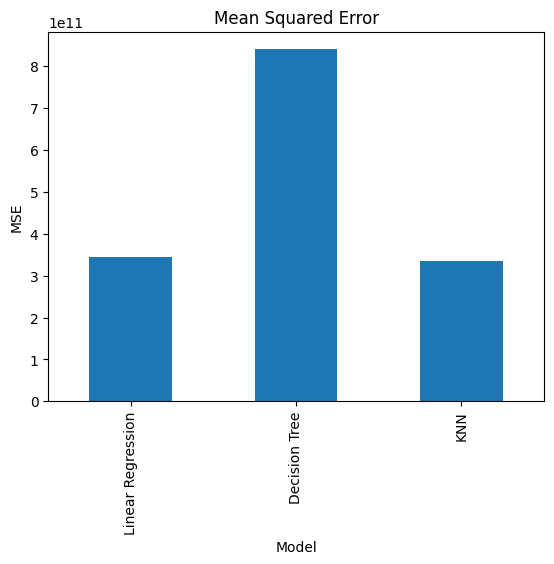

In [33]:
# Section 7: In this section we will vislualize the results

# 1) Creating Bar chart for MSE (lower is better)
ax = df_results['MSE'].plot(kind='bar', title='Mean Squared Error')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.show()

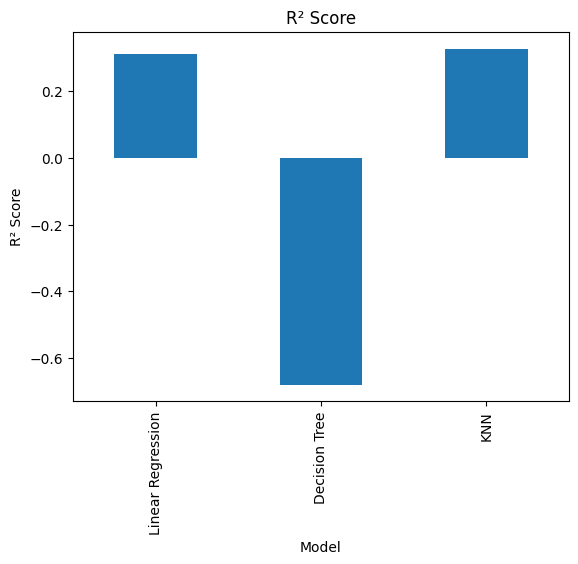

In [34]:
# 2) Bar chart for R² (higher is better)
ax = df_results['R² Score'].plot(kind='bar', title='R² Score')
ax.set_xlabel('Model')
ax.set_ylabel('R² Score')
plt.show()

# Section 8:
 In this section In this section, we use **Principal Component Analysis (PCA)** to reduce our feature space to two dimensions, then apply **KMeans** clustering to uncover natural groupings in the data. This is useful in analytics when you want to segment customers or spot anomalous patterns without relying on a target variable.


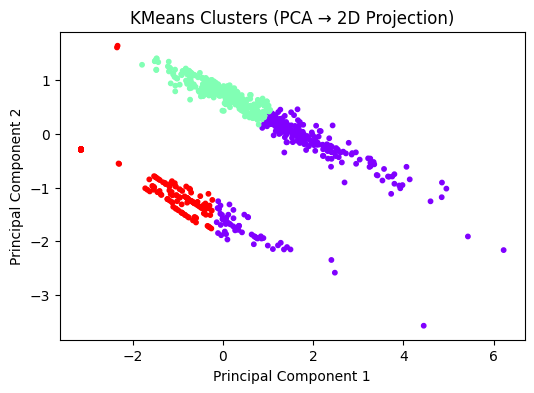

In [35]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# 1) Project test features into 2D with PCA
x2 = PCA(n_components=2, random_state=42).fit_transform(x_test_scaled)
# 2) Run Kmeans to identify 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(x2)
# 3) Plotting the charts
plt.figure(figsize=(6,4))
plt.scatter(x2[:, 0], x2[:, 1], c=labels, cmap='rainbow', s=10)
plt.title('KMeans Clusters (PCA → 2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()





* PCA squashes our many features down into two dimensions so we can actually draw and look at them.
* KMeans then finds groups of points that sit close together in that 2-D space.


*  When we plot those points and color each by its cluster
*  we can instantly spot natural groupings or oddballs that we’d miss in the full, high-dimensional data.





##Conclusion:
Of these three, KNN Regressor achieves the best balance of low error (MSE) and higher
explained variance (R²), making it our top choice for this dataset.